In [2]:
import pandas as pd
import numpy as np

In [3]:
data=np.loadtxt("data.csv",delimiter=",")

In [6]:
x=data[:,0].reshape(-1)

In [10]:
x=x.reshape(100,1)

In [11]:
x.shape

(100, 1)

In [12]:
y=data[:,1]

In [13]:
y.shape

(100,)

In [110]:
from sklearn import model_selection
X_train,X_test,Y_train,Y_test=model_selection.train_test_split(x,y,test_size=0.3)

In [111]:
X_train.shape


(70, 1)

In [112]:
def fit(x,y):
    """ Function which fits the values of x (assuming data to be in form of a column vector(n x 1)  with y of shape (n,)  """
    num=(x[:,0]*y).mean()-x[:,0].mean()*y.mean()
    den=(x[:,0]**2).mean()-(x[:,0].mean())**2
    m=num/den
    c=(y.mean()-m*x[:,0].mean())
    return m,c   

In [113]:
def predict(x,m,c):
    """ Returns a Column vector of shape (n x 1) (Same as shape of X)"""
    return m*x+c

In [114]:
def score(y_true,y_pred):
    u=((y_true-y_pred[:,0])**2).sum()
    v=((y_true-y_true.mean())**2).sum()
    return 1-u/v


In [115]:
def cost(x,y,m,c):
    C=np.sum((y-(m*x[:,0]+c))**2)
    return C

In [116]:
m,c=fit(X_train,Y_train)
Y_pred=predict(X_train,m,c)
score(Y_train,Y_pred)

0.5440786510464093

In [117]:
import matplotlib.pyplot as plt


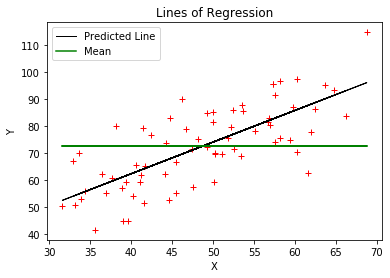

In [118]:
plt.plot(X_train,Y_train,"r+")
plt.plot(X_train,Y_pred,linewidth=1,color="black",label="Predicted Line")
Y_mean=(Y_train.mean())
Y_mean=np.array([Y_mean for i in range(X_train.shape[0])])
plt.plot(X_train,Y_mean,color="green",label="Mean")
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Lines of Regression")
plt.show()

In [119]:
print("M: ",m,"C: ",c)
print("Train Score :",score(Y_train,predict(X_train,m,c)))
print("Test Score :",score(Y_test,predict(X_test,m,c)))

M:  1.1760246689724725 C:  15.261581583690045
Train Score : 0.5440786510464093
Test Score : 0.6528114654023076
